# Cross-validation
We want to implement cross-validation for logistic regression. Cross-validation is a powerful technique for model selection (such as when choosing the right hyper-parameters), especially when the data size is not very large. The goal of this assignment is to first implement cross-validation and compare it to a baseline model (with no cross-validation).

1. Refactor the code from the lab and train and evaluate the `LogisticRegression` classifier just like we did in the lab.

Accuracy score for Logistic Regression: 0.9607843137254902


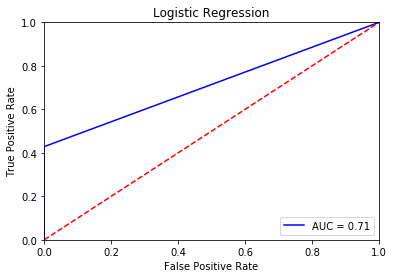

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#load data
boston = load_boston()
df_boston = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df_boston.head()
df_boston['is_above_40k'] = boston['target'] >= 40

#split data
x_train, x_test, y_train, y_test = train_test_split(df_boston.drop(columns = 'is_above_40k'), 
                                                    df_boston['is_above_40k'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

#logistic regresstion training with max iteration = 5000
logit = LogisticRegression(max_iter=5000)
logit.fit(x_train, y_train)
y_test_pred_lr = logit.predict(x_test)

#metric to evaluate the model
cm_lr = metrics.confusion_matrix(y_test, y_test_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_test_pred_lr)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

#accuracy score
acc_score_lr = accuracy_score(y_test, y_test_pred_lr)
print("Accuracy score for Logistic Regression: " + str(acc_score_lr))

#plot
plt.title('Logistic Regression')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

2. The `LogisticRegression` classifier has an argument called `class_weight`. Read the documentation to see what it does, then train a new model this time by providing the class weights. 

Accuracy score for Logistic Regression: 0.9411764705882353


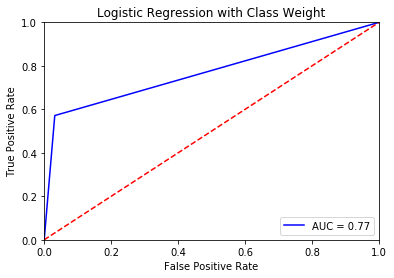

In [2]:
# train model with Logistic Regression and balance class weight
logit_cw = LogisticRegression(class_weight='balanced', max_iter=5000)
logit_cw.fit(x_train, y_train)
y_test_pred_cw = logit_cw.predict(x_test)

# metric for evaluation
cm_cw = metrics.confusion_matrix(y_test, y_test_pred_cw)
fpr_cw, tpr_cw, thresholds_cw = metrics.roc_curve(y_test, y_test_pred_cw)
roc_auc_cw = metrics.auc(fpr_cw, tpr_cw)

#accuracy score
acc_score_cw = accuracy_score(y_test, y_test_pred_cw)
print("Accuracy score for Logistic Regression: " + str(acc_score_cw))

#visualize metric
plt.title('Logistic Regression with Class Weight')
plt.plot(fpr_cw, tpr_cw, 'b', label = 'AUC = %0.2f' % roc_auc_cw)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The area under the curve (AUC) increases from 0.71 to 0.77, which tells me balance class weight is a better model. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

4. Return to the training step but use `LogisticRegressionCV` this time (the CV stands for cross-validation).

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


9.70 sec
accuracy score for Logistic Regression: 0.9313725490196079


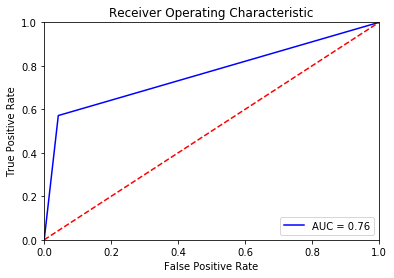

In [3]:
import time
from sklearn.linear_model import LogisticRegressionCV

start_time = time.time() # start the clock

#Logistic Regression CV
logit_cv = LogisticRegressionCV(cv=5, class_weight = 'balanced', max_iter = 5000)
logit_cv.fit(x_train, y_train)
y_test_pred_cv = logit_cv.predict(x_test)

total_execution_time = time.time() - start_time #stop the clock
print('%0.2f sec' % total_execution_time)

#metric for model evaluation
cm_cv = metrics.confusion_matrix(y_test, y_test_pred_cv)
fpr_cv, tpr_cv, thresholds_cv = metrics.roc_curve(y_test, y_test_pred_cv)
roc_auc_cv = metrics.auc(fpr_cv, tpr_cv)

#accuracy score
acc_score_cv = accuracy_score(y_test, y_test_pred_cv)
print("accuracy score for Logistic Regression: " + str(acc_score_cv))

#visualize metric
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_cv, tpr_cv, 'b', label = 'AUC = %0.2f' % roc_auc_cv)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


6. Change the number of folds from 5 to 10 and train the CV model again? Notice any difference in performance? Note that *performance* here refers to the model's overall accuracy, based on your choice of metric, it does NOT refer to run-time.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Run time is 21.21 sec
Accuracy score for Logistic Regression: 0.9411764705882353


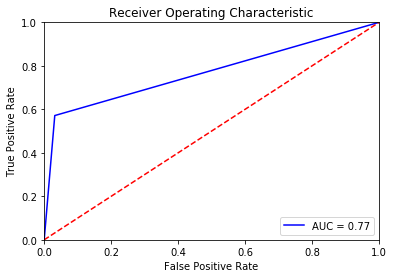

In [4]:
start_time = time.time()
logit_cv = LogisticRegressionCV(cv=10,class_weight = 'balanced',max_iter=5000)
logit_cv.fit(x_train, y_train)
y_test_pred_cv = logit_cv.predict(x_test)
total_execution_time = time.time() - start_time
print('Run time is %0.2f sec' % total_execution_time)

#metric for model evaluation
cm_cv = metrics.confusion_matrix(y_test, y_test_pred_cv)
fpr_cv, tpr_cv, thresholds_cv = metrics.roc_curve(y_test, y_test_pred_cv)
roc_auc_cv = metrics.auc(fpr_cv, tpr_cv)

#accuracy score
acc_score_cv = accuracy_score(y_test, y_test_pred_cv)
print("Accuracy score for Logistic Regression: " + str(acc_score_cv))

#visualize metric
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_cv, tpr_cv, 'b', label = 'AUC = %0.2f' % roc_auc_cv)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Run-time increases as number of folds increases